In [3]:
# %load_ext autoreload
# %autoreload 2

import os
import json

import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

pd.set_option('display.width', 250)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

%matplotlib inline
mpl.rcParams['animation.embed_limit'] = 100

root_path = os.path.abspath("..")
import sys
sys.path.append(root_path)
import config as C

In [30]:
def distance_ball_goal(merged_df):
    goal_x = np.where(merged_df['team'] == 'Home', C.PITCH_X_MAX, C.PITCH_X_MIN)
    goal_y = 0  # 양쪽 골대 y좌표는 동일
    dx = goal_x - merged_df['ball_x']
    dy = goal_y - merged_df['ball_y']
    distance = np.sqrt(dx**2 + dy**2)
    return pd.DataFrame({'distance_ball_goal' : distance},index=merged_df.index)


In [5]:
raw_data_path = "/home/exPress/PlayerImputer/data/BEPRO/2024"
processed_data_path = "/home/exPress/express-v2/data/bepro/processed"
match_ids = sorted(os.listdir(raw_data_path))
os.listdir(os.path.join(raw_data_path, match_ids[39]))

['153390_1_event_data.json',
 '153390_1_frame_data.jsonl',
 '153390_2_event_data.json',
 '153390_2_frame_data.jsonl',
 '153390_metadata.json']

In [4]:
for i, match_id in enumerate(match_ids):
    metadata_path = f"{raw_data_path}/{match_id}/{match_id}_metadata.json"
    with open(metadata_path) as f:
        metadata = json.load(f)
        home_team =TEAM_NAME[metadata["home_team"]["team_name"]]
        away_team =TEAM_NAME[metadata["away_team"]["team_name"]]
        print(f"[{i}] {match_id}: {home_team} vs {away_team}")

[0] 153373: Incheon United vs Gwangju FC
[1] 126401: Gwangju FC vs Jeju SK FC
[2] 126386: Daejeon Hana Citizen vs Gwangju FC
[3] 126418: Gwangju FC vs Incheon United
[4] 126306: Gwangju FC vs Daegu FC
[5] 126350: Daegu FC vs Gwangju FC
[6] 126380: Gwangju FC vs Gimcheon Sangmu
[7] 153387: Ulsan HD FC vs Suwon FC
[8] 126293: Gwangju FC vs Gangwon FC
[9] 126319: Jeonbuk Hyundai Motors vs Gwangju FC
[10] 153381: Suwon FC vs Gangwon FC
[11] 126455: Daejeon Hana Citizen vs Gwangju FC
[12] 126444: Gangwon FC vs Gwangju FC
[13] 153390: Gwangju FC vs Jeonbuk Hyundai Motors
[14] 126424: Daegu FC vs Gwangju FC
[15] 126367: Gwangju FC vs Pohang Steelers
[16] 126341: Jeju SK FC vs Gwangju FC
[17] 126466: Gwangju FC vs Jeju SK FC
[18] 126473: Gimcheon Sangmu vs Gwangju FC
[19] 126364: Incheon United vs Gwangju FC
[20] 153385: Jeju SK FC vs Gwangju FC
[21] 126429: Gwangju FC vs Suwon FC
[22] 126325: Gwangju FC vs Ulsan HD FC
[23] 126298: Pohang Steelers vs Gwangju FC
[24] 126378: FC Seoul vs Gwangju

In [124]:
match_path = f"{raw_data_path}/{match_id}"
os.listdir(match_path)

['126285_1_frame_data.jsonl',
 '126285_metadata.json',
 '126285_2_event_data.json',
 '126285_1_event_data.json',
 '126285_2_frame_data.jsonl']

In [3]:
match_id = "126285"
match_path = f"{processed_data_path}/{match_id}"

with open(f"{match_path}/{match_id}_processed_dict.pkl", "rb") as f:
    match_dict = pickle.load(f)

match_dict.keys()

dict_keys(['tracking_df', 'event_df', 'teams', 'meta_data'])

In [ ]:
import os
import glob
import pickle
import pandas as pd

# base path
base_dir = "/home/exPress/express-v2/data/bepro/processed"

# 모든 match_id 디렉토리 순회
match_dirs = sorted(glob.glob(os.path.join(base_dir, "*")))  # 예: /.../processed/1539123

for match_path in match_dirs:
    match_id = os.path.basename(match_path)

    pkl_path = os.path.join(match_path, f"{match_id}_processed_dict.pkl")
    if not os.path.exists(pkl_path):
        print(f"Skipping {match_id}, pkl not found.")
        continue

    with open(pkl_path, "rb") as f:
        match_dict = pickle.load(f)

    # 팀 정보 가져오기
    teams_dict = match_dict['teams']
    teams_df = pd.concat([teams_dict['Home'], teams_dict['Away']])
    teams_df.reset_index(drop=True, inplace=True)

    # player_code: 예) H02, A10
    teams_df['player_code'] = teams_df.apply(
        lambda row: row['team'][0] + str(row['xID']).zfill(2), axis=1
    )

    # 저장
    save_path = os.path.join(match_path, f"{match_id}_teams.csv")
    teams_df.to_csv(save_path, index=False)
    print(f"Saved team info for match {match_id} to {save_path}")


In [10]:
match_id = 153381
match_path = f"{processed_data_path}/{match_id}"

with open(f"{match_path}/{match_id}_processed_dict.pkl", "rb") as f:
    match_dict = pickle.load(f)

tracking_df = match_dict['tracking_df']
event_df = pd.read_csv(os.path.join(match_path,'valid_events.csv'))
teams_dict = match_dict['teams']
meta_data = match_dict['meta_data']

In [11]:
teams_df = pd.concat([teams_dict['Home'], teams_dict['Away']])
teams_df.reset_index(drop=True, inplace=True)
teams_df['player_code'] = teams_df.apply(lambda row : row['team'][0] + str(row['xID']).zfill(2), axis=1)
teams_df

,player,position,team,jID,pID,tID,xID,player_code
0,Dongwon Ji,CF,Home,10,500530,4220,0,H00
1,Ju Yeop Kim,None,Home,24,77715,4220,1,H01
2,Taehan Kim,CB,Home,15,500547,4220,2,H02
3,Joon Soo Ahn,GK,Home,13,500552,4220,3,H03
4,Hyunyong Lee,CB,Home,30,354820,4220,4,H04
5,Young Woo Jang,None,Home,26,500540,4220,5,H05
6,Gyowon Han,RW,Home,71,532196,4220,6,H06
7,Yoonho Jo,RWB,Home,4,500543,4220,7,H07
8,Jungwoo Ha,None,Home,39,503230,4220,8,H08
9,Minki Jeong,None,Home,99,532195,4220,9,H09


In [14]:
event_df[event_df['player_id'].isna()]

,game_id,original_event_id,action_id,period_id,time_seconds,relative_time_seconds,team_id,player_id,relative_player_id,reactor_team_id,reactor_player_id,type_name,type_id,result_name,relative_id,pair_id,start_x,start_y,end_x,end_y,dx,dy


In [13]:
event_df = event_df.dropna(subset=['player_id']) 
event_df['player_id'] = event_df['player_id'].astype(int).astype(str)
tracking_df['period_id'] = tracking_df['period_id'].astype('int')

event_df + teams_df

In [15]:
event_df = event_df.merge(
    teams_df,
    how='left',
    left_on=['player_id'],
    right_on=['pID']
)

events = event_df.drop(['player_id', 'team_id'], axis=1)
events["pID"] = events["pID"].astype(str)
events.head()

,game_id,original_event_id,action_id,period_id,time_seconds,relative_time_seconds,relative_player_id,reactor_team_id,reactor_player_id,type_name,type_id,result_name,relative_id,pair_id,start_x,start_y,end_x,end_y,dx,dy,player,position,team,jID,pID,tID,xID,player_code
0,153381,0.0,0,1,0.600,NaN,-1.0,-1,-1.0,Pass,38,Successful,-1.0,-1.0,52.4790,33.9728,52.3320,35.8972,-0.147,1.9244,Dongwon Ji,CF,Home,10,500530,4220,0,H00
1,153381,1.0,1,1,1.133,NaN,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,-1.0,52.3320,35.8972,52.3320,35.8972,0.000,0.0000,Dongwon Ji,CF,Home,10,500530,4220,0,H00
2,153381,3.0,2,1,2.700,4.067,354812.0,-1,-1.0,Pass,38,Successful,4.0,-1.0,52.9305,35.8904,34.1985,39.1136,-18.732,3.2232,Anderson Oliveira,LW,Home,70,500549,4220,14,H14
3,153381,4.0,3,1,4.067,NaN,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,-1.0,34.1985,39.1136,34.1985,39.1136,0.000,0.0000,Bitgaram Yoon,CDM,Home,14,354812,4220,12,H12
4,153381,NaN,4,1,4.068,NaN,NaN,-1,-1.0,Carry,28,NaN,NaN,NaN,34.1985,39.1136,28.2135,41.0652,-5.985,1.9516,Bitgaram Yoon,CDM,Home,14,354812,4220,12,H12


tracking_df + teams_df

In [16]:
tracking_df = tracking_df.merge(
    teams_df[['pID', 'player_code']],
    how='left',
    left_on = 'id',
    right_on = 'pID'
)
tracking_df.drop(['pID'], axis=1, inplace=True)

# Ball id
nan_mask = pd.isna(tracking_df['player_code'])
tracking_df.loc[nan_mask, 'player_code'] = tracking_df.loc[nan_mask, 'id']
tracking_df[pd.isna(tracking_df['player_code'])]

,game_id,period_id,timestamp,frame_id,ball_state,ori_ball_owning_team_id,x,y,z,vx,vy,vz,v,ax,ay,az,a,id,team_id,position_name,ball_owning_team_id,is_ball_carrier,player_code


In [17]:
wide_tracking_df = tracking_df.pivot_table(
    index= ['period_id', 'timestamp', 'frame_id'],
    columns='player_code',
    values=['x', 'y', 'vx', 'vy', 'v', 'ax', 'ay', 'a']
)

wide_tracking_df.columns = [f'{player_code}_{value}' for value, player_code in wide_tracking_df.columns]
wide_tracking_df.reset_index(inplace=True)
wide_tracking_df.head()

,period_id,timestamp,frame_id,A00_a,A02_a,A03_a,A04_a,A05_a,A06_a,A07_a,A10_a,A11_a,A12_a,A13_a,A14_a,...,H02_y,H03_y,H04_y,H06_y,H07_y,H10_y,H11_y,H12_y,H13_y,H14_y,H15_y,H16_y,H17_y,H19_y,ball_y
0,1,0 days 00:00:00.600000,15,1.278387,NaN,NaN,0.068126,0.799442,0.279866,0.262767,NaN,0.284743,1.251408,NaN,0.652580,...,-1.8656,0.644400,6.104600,-16.157700,NaN,-9.127000,NaN,0.492800,31.382700,NaN,-4.676100,NaN,-12.629300,NaN,-0.025600
1,1,0 days 00:00:00.640000,16,1.465203,NaN,NaN,0.054470,1.107156,0.275881,0.255603,NaN,0.302785,1.469195,NaN,0.768951,...,-1.8626,0.657401,6.104600,-16.215349,NaN,-9.174896,NaN,0.482683,31.382795,NaN,-4.701125,NaN,-12.648627,NaN,0.129619
2,1,0 days 00:00:00.680000,17,1.802636,NaN,NaN,0.048716,1.248554,0.364758,0.376512,NaN,0.255916,1.631807,NaN,0.838714,...,-1.8626,0.669336,6.104600,-16.273029,NaN,-9.221995,NaN,0.470595,31.384434,NaN,-4.723412,NaN,-12.669609,NaN,0.283188
3,1,0 days 00:00:00.720000,18,2.293064,NaN,NaN,0.041148,1.488396,0.424838,0.509155,NaN,0.222464,1.784594,NaN,0.889173,...,-1.8626,0.680334,6.104600,-16.331182,NaN,-9.267721,NaN,0.456624,31.386104,NaN,-4.743860,NaN,-12.692065,NaN,0.435797
4,1,0 days 00:00:00.760000,19,2.776985,NaN,NaN,0.023900,1.596727,0.451406,0.612236,NaN,0.224166,1.852801,NaN,0.865995,...,-1.8626,0.690166,6.112236,-16.391783,NaN,-9.312323,NaN,0.440375,31.386400,NaN,-4.747300,NaN,-12.716247,NaN,0.591365


In [108]:
wide_tracking_df

,period_id,timestamp,frame_id,A00_a,A01_a,A02_a,A03_a,A04_a,A05_a,A06_a,A07_a,A08_a,A09_a,A10_a,A12_a,...,H02_y,H03_y,H04_y,H05_y,H06_y,H07_y,H08_y,H09_y,H10_y,H13_y,H14_y,H17_y,H18_y,H19_y,ball_y
0,1,0 days 00:00:01.600000,40,0.838733,0.793300,0.450106,1.148841,0.382107,0.799559,0.188160,0.243652,1.816677,1.210121,0.369728,NaN,...,-2.359300,-13.559400,17.767500,-24.221900,-0.352700,20.775700,-9.819000,8.185700,0.460700,NaN,NaN,NaN,NaN,NaN,1.287600
1,1,0 days 00:00:01.640000,41,0.904181,0.704708,0.638604,1.270270,0.262840,1.105763,0.337045,0.183941,2.023517,1.403381,0.464270,NaN,...,-2.386312,-13.579826,17.804684,-24.242396,-0.341169,20.784107,-9.818958,8.196804,0.467131,NaN,NaN,NaN,NaN,NaN,1.643270
2,1,0 days 00:00:01.680000,42,0.875524,0.946334,0.627473,1.167356,0.281366,1.077576,0.391366,0.263823,1.829872,1.494680,0.434933,NaN,...,-2.411206,-13.600561,17.842351,-24.261412,-0.330827,20.794344,-9.817430,8.207223,0.472151,NaN,NaN,NaN,NaN,NaN,1.995164
3,1,0 days 00:00:01.720000,43,0.937328,0.866847,0.745388,1.307784,0.333779,1.316809,0.404637,0.414297,1.848328,1.727155,0.623401,NaN,...,-2.433778,-13.621836,17.880508,-24.279100,-0.321149,20.806526,-9.813302,8.216889,0.475823,NaN,NaN,NaN,NaN,NaN,2.344785
4,1,0 days 00:00:01.760000,44,1.011909,0.753759,0.797850,1.511862,0.430098,1.576912,0.467204,0.610786,1.828489,1.913095,0.774103,NaN,...,-2.454682,-13.644385,17.920163,-24.295993,-0.311446,20.820980,-9.808060,8.225870,0.478688,NaN,NaN,NaN,NaN,NaN,2.701202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152038,2,0 days 01:37:53.440000,146836,0.748291,0.631266,1.317758,1.258785,NaN,2.167095,1.465961,0.953856,NaN,NaN,NaN,4.001024,...,NaN,27.966564,-0.443267,33.815194,24.446200,NaN,NaN,NaN,NaN,16.733195,-9.916629,7.991933,11.411870,-9.674478,34.000000
152039,2,0 days 01:37:53.480000,146837,0.694501,0.874620,1.188085,1.225212,NaN,2.376209,1.258350,1.009295,NaN,NaN,NaN,3.920153,...,NaN,28.061061,-0.448157,33.830899,24.521979,NaN,NaN,NaN,NaN,16.790950,-9.917300,8.071148,11.437919,-9.729848,34.000000
152040,2,0 days 01:37:53.520000,146838,0.680923,0.853214,0.744852,1.152649,NaN,2.517717,1.242401,0.988070,NaN,NaN,NaN,3.924175,...,NaN,28.154166,-0.452949,33.846077,24.596844,NaN,NaN,NaN,NaN,16.847403,-9.917300,8.149995,11.462881,-9.781088,34.000000
152041,2,0 days 01:37:53.560000,146839,0.680923,0.853214,0.744852,1.152649,NaN,2.517717,1.242401,0.988070,NaN,NaN,NaN,3.924175,...,NaN,28.248311,-0.457476,33.860560,24.672784,NaN,NaN,NaN,NaN,16.903924,-9.917300,8.230794,11.488281,-9.830237,34.000000


### 시간 매칭

In [18]:
# Event 데이터 시간 조정

first_half_end = event_df.loc[event_df['period_id'] == 1, 'time_seconds'].max()
# 2피리어드 필터링
second_half_mask = event_df['period_id'] == 2
# 시간 이동
first_half_end = event_df.loc[event_df['period_id'] == 1, 'time_seconds'].max()

# 2피리어드 필터링
second_half_mask = event_df['period_id'] == 2

# 시간 이동
event_df.loc[event_df['period_id'] == 2, 'time_seconds'] += first_half_end

In [19]:
# tracking 데이터 시간 조정

converted_timestamps = pd.to_timedelta(wide_tracking_df['timestamp'], errors='coerce')
seconds  = converted_timestamps.dt.total_seconds()
    # 전반 종료, 후반 시작 간 시간차 계산
first_half_end = seconds[wide_tracking_df['period_id'] == 1].max()
second_half_start = seconds[wide_tracking_df['period_id'] == 2].min()
offset = first_half_end - second_half_start

# 후반전만 offset 추가
seconds_adjusted = seconds.copy()
seconds_adjusted[wide_tracking_df['period_id'] == 2] += offset 
wide_tracking_df['time_seconds'] = seconds_adjusted

In [21]:
event_df = event_df.sort_values(['period_id', 'time_seconds'])
wide_tracking_df = wide_tracking_df.sort_values(['period_id', 'time_seconds'])


In [123]:
event_df

,game_id,original_event_id,action_id,period_id,time_seconds,relative_time_seconds,team_id,player_id,relative_player_id,reactor_team_id,reactor_player_id,type_name,type_id,result_name,relative_id,pair_id,start_x,start_y,end_x,end_y,dx,dy,player,position,team,jID,pID,tID,xID,player_code
0,126285,0.0,0,1,1.501,2.334,4648,250102,77414.0,-1,-1.0,Pass,38,Successful,1.0,-1.0,52.6050,34.4080,44.8980,41.7384,-7.7070,7.3304,Kunhee Lee,CF,Home,20,250102,4648,10,H10
1,126285,1.0,1,1,2.334,NaN,4648,77414,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,-1.0,44.8980,41.7384,44.8980,41.7384,0.0000,0.0000,Huigyun Lee,CF,Home,10,77414,4648,9,H09
2,126285,2.0,2,1,3.101,4.134,4648,77414,250101.0,-1,-1.0,Pass,38,Successful,3.0,-1.0,44.4150,41.0856,38.9760,34.7888,-5.4390,-6.2968,Huigyun Lee,CF,Home,10,77414,4648,9,H09
3,126285,3.0,3,1,4.134,NaN,4648,250101,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,-1.0,38.9760,34.7888,38.9760,34.7888,0.0000,0.0000,Hoyeon Jeong,CM,Home,14,250101,4648,6,H06
4,126285,4.0,4,1,5.334,6.567,4648,250101,62365.0,-1,-1.0,Pass,38,Successful,5.0,-1.0,38.4195,32.7012,29.9250,27.2068,-8.4945,-5.4944,Hoyeon Jeong,CM,Home,14,250101,4648,6,H06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,126285,3907.0,2882,2,11899.034,3169.700,4648,500138,500135.0,-1,-1.0,Pass,38,Successful,3914.0,-1.0,16.3380,28.9748,40.5510,6.6708,24.2130,-22.3040,Junsu Byeon,CB,Home,15,500138,4648,13,H13
2883,126285,3914.0,2883,2,11901.701,NaN,4648,500135,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,-1.0,40.5510,6.6708,40.5510,6.6708,0.0000,0.0000,Gabriel,RM,Home,11,500135,4648,5,H05
2884,126285,NaN,2884,2,11901.702,NaN,4648,500135,NaN,-1,-1.0,Carry,28,NaN,NaN,NaN,40.5510,6.6708,38.4405,0.0000,-2.1105,-6.6708,Gabriel,RM,Home,11,500135,4648,5,H05
2885,126285,3916.0,2885,2,11905.434,NaN,4648,500135,-1.0,-1,-1.0,Take-On,29,Successful,-1.0,-1.0,38.4405,0.0000,38.4405,0.0000,0.0000,0.0000,Gabriel,RM,Home,11,500135,4648,5,H05


In [22]:
traces_df = pd.merge_asof(
    event_df,
    wide_tracking_df,
    by='period_id',  # 동일한 period 내에서만 병합
    on='time_seconds',
    direction='nearest'  # 가장 가까운 값으로
)

In [23]:
traces_df[['frame_id']]

,frame_id
0,15
1,28
2,67
3,102
4,102
...,...
2735,140874
2736,140907
2737,140907
2738,140937


In [117]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.backends
def visualize(index):
    row = traces_df.iloc[index]

    # 피치 좌표계: 왼쪽 아래가 (0,0)
    pitch = Pitch(pitch_type='custom',
                  pitch_length=105, pitch_width=68,
                  line_color='white',
                  axis=True,  # ✅ 축 표시
                  label=True,  # ✅ 축 눈금값 라벨 표시
                  pitch_color='grass',
                  stripe=True)
    fig, ax = pitch.draw()

    # 홈팀
    home_x, home_y = [], []
    for i in range(20):
        x, y = row.get(f'H{i:02}_x'), row.get(f'H{i:02}_y')
        if pd.notna(x) and pd.notna(y):
            x += 52.5
            y += 34
            home_x.append(x); home_y.append(y)
            pitch.annotate(str(i), (x, y), ax=ax,
                           va='center', ha='center', color='white', fontsize=10)
    pitch.scatter(home_x, home_y, ax=ax, color='blue', s=200, label='Home')

    # 어웨이팀
    away_x, away_y = [], []
    for i in range(20):
        x, y = row.get(f'A{i:02}_x'), row.get(f'A{i:02}_y')
        if pd.notna(x) and pd.notna(y):
            x += 52.5
            y += 34
            away_x.append(x); away_y.append(y)
            pitch.annotate(str(i), (x, y), ax=ax,
                           va='center', ha='center', color='white', fontsize=10)
    pitch.scatter(away_x, away_y, ax=ax, color='red', s=200, label='Away')

    # 공
    ball_x, ball_y = row['ball_x'] + 52.5, row['ball_y'] + 34
    pitch.scatter(ball_x, ball_y, ax=ax, color='yellow', s=100,
                  edgecolors='black', linewidth=1.0, label='Ball')

    # 시간 표시
    time_str = str(row['timestamp']).split(' ')[-1].split('.')[0]
    plt.title(f"Player Positions at {time_str}")
    plt.legend(loc='upper right')
    plt.show()


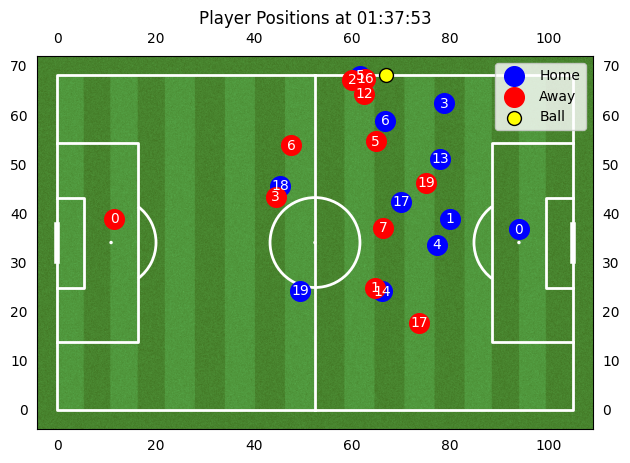

In [118]:
visualize(2000)

좌우반전

In [49]:
import config as C
x_cols = [col for col in traces_df.columns if col.endswith("_x")]
y_cols = [col for col in traces_df.columns if col.endswith("_y")]
home_x_cols = [col for col in x_cols if col.startswith("H")]
away_x_cols = [col for col in x_cols if col.startswith("A")]

for period_id in traces_df["period_id"].unique():
    # 전/후반 첫번째 프레임의 평균 x좌표를 구함
    home_x = np.nanmean(traces_df.loc[traces_df["period_id"] == period_id, home_x_cols].values[0])
    away_x = np.nanmean(traces_df.loc[traces_df["period_id"] == period_id, away_x_cols].values[0])

    # 원정팀이 왼쪽에서 플레이를 시작 한다면, 좌우 반전 -> Home이 항상 왼쪽->오른쪽으로 공격
    # 공도 같이 좌우 반전: 학습에는 사용하지 않지만 downstream task에 사용하기 위함
    if away_x < home_x:
        traces_df.loc[traces_df["period_id"] == period_id, x_cols] = - traces_df.loc[traces_df["period_id"] == period_id, x_cols].values
        traces_df.loc[traces_df["period_id"] == period_id, y_cols] = - traces_df.loc[traces_df["period_id"] == period_id, y_cols].values


In [125]:
traces_df

,game_id,original_event_id,action_id,period_id,time_seconds,relative_time_seconds,team_id,player_id,relative_player_id,reactor_team_id,reactor_player_id,type_name,type_id,result_name,relative_id,...,H02_y,H03_y,H04_y,H05_y,H06_y,H07_y,H08_y,H09_y,H10_y,H13_y,H14_y,H17_y,H18_y,H19_y,ball_y
0,126285,0.0,0,1,1.501,2.334,4648,250102,77414.0,-1,-1.0,Pass,38,Successful,1.0,...,-2.359300,-13.559400,17.767500,-24.221900,-0.352700,20.775700,-9.819000,8.185700,0.460700,NaN,NaN,NaN,NaN,NaN,1.287600
1,126285,1.0,1,1,2.334,NaN,4648,77414,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,...,-2.665433,-14.070258,18.489965,-24.450237,-0.029044,21.396381,-9.720638,8.150633,0.434467,NaN,NaN,NaN,NaN,NaN,7.666288
2,126285,2.0,2,1,3.101,4.134,4648,77414,250101.0,-1,-1.0,Pass,38,Successful,3.0,...,-3.230077,-14.703390,19.362455,-24.717491,0.505633,22.872612,-9.770800,7.670211,0.224064,NaN,NaN,NaN,NaN,NaN,6.976466
3,126285,3.0,3,1,4.134,NaN,4648,250101,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,...,-4.142773,-15.583409,20.407673,-25.926916,0.881285,25.129511,-9.909202,7.149500,0.153235,NaN,NaN,NaN,NaN,NaN,0.855635
4,126285,4.0,4,1,5.334,6.567,4648,250101,62365.0,-1,-1.0,Pass,38,Successful,5.0,...,-5.455118,-16.707928,21.987812,-27.708664,-0.266903,27.855749,-10.644210,7.271486,0.042221,NaN,NaN,NaN,NaN,NaN,-1.271192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,126285,3907.0,2882,2,8988.367,3169.700,4648,500138,500135.0,-1,-1.0,Pass,38,Successful,3914.0,...,NaN,28.339200,-0.461400,33.873400,24.746200,NaN,NaN,NaN,NaN,16.9577,-9.9173,8.3096,11.5137,-9.8757,34.000000
2883,126285,3914.0,2883,2,8991.034,NaN,4648,500135,-1.0,-1,-1.0,Pass Received,22,NaN,-1.0,...,NaN,28.339200,-0.461400,33.873400,24.746200,NaN,NaN,NaN,NaN,16.9577,-9.9173,8.3096,11.5137,-9.8757,34.000000
2884,126285,NaN,2884,2,8991.035,NaN,4648,500135,NaN,-1,-1.0,Carry,28,NaN,NaN,...,NaN,28.339200,-0.461400,33.873400,24.746200,NaN,NaN,NaN,NaN,16.9577,-9.9173,8.3096,11.5137,-9.8757,34.000000
2885,126285,3916.0,2885,2,8994.767,NaN,4648,500135,-1.0,-1,-1.0,Take-On,29,Successful,-1.0,...,NaN,28.339200,-0.461400,33.873400,24.746200,NaN,NaN,NaN,NaN,16.9577,-9.9173,8.3096,11.5137,-9.8757,34.000000


In [57]:
wide_tracking_df

,period_id,timestamp,A00_a,A01_a,A02_a,A03_a,A04_a,A05_a,A06_a,A07_a,A08_a,A09_a,A10_a,A12_a,A16_a,...,H03_y,H04_y,H05_y,H06_y,H07_y,H08_y,H09_y,H10_y,H13_y,H14_y,H17_y,H18_y,H19_y,ball_y,time_seconds
0,1,0 days 00:00:01.600000,0.838733,0.793300,0.450106,1.148841,0.382107,0.799559,0.188160,0.243652,1.816677,1.210121,0.369728,NaN,NaN,...,-13.559400,17.767500,-24.221900,-0.352700,20.775700,-9.819000,8.185700,0.460700,NaN,NaN,NaN,NaN,NaN,1.287600,1.60
1,1,0 days 00:00:01.640000,0.904181,0.704708,0.638604,1.270270,0.262840,1.105763,0.337045,0.183941,2.023517,1.403381,0.464270,NaN,NaN,...,-13.579826,17.804684,-24.242396,-0.341169,20.784107,-9.818958,8.196804,0.467131,NaN,NaN,NaN,NaN,NaN,1.643270,1.64
2,1,0 days 00:00:01.680000,0.875524,0.946334,0.627473,1.167356,0.281366,1.077576,0.391366,0.263823,1.829872,1.494680,0.434933,NaN,NaN,...,-13.600561,17.842351,-24.261412,-0.330827,20.794344,-9.817430,8.207223,0.472151,NaN,NaN,NaN,NaN,NaN,1.995164,1.68
3,1,0 days 00:00:01.720000,0.937328,0.866847,0.745388,1.307784,0.333779,1.316809,0.404637,0.414297,1.848328,1.727155,0.623401,NaN,NaN,...,-13.621836,17.880508,-24.279100,-0.321149,20.806526,-9.813302,8.216889,0.475823,NaN,NaN,NaN,NaN,NaN,2.344785,1.72
4,1,0 days 00:00:01.760000,1.011909,0.753759,0.797850,1.511862,0.430098,1.576912,0.467204,0.610786,1.828489,1.913095,0.774103,NaN,NaN,...,-13.644385,17.920163,-24.295993,-0.311446,20.820980,-9.808060,8.225870,0.478688,NaN,NaN,NaN,NaN,NaN,2.701202,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152038,2,0 days 01:37:53.440000,0.748291,0.631266,1.317758,1.258785,NaN,2.167095,1.465961,0.953856,NaN,NaN,NaN,4.001024,4.392208,...,27.966564,-0.443267,33.815194,24.446200,NaN,NaN,NaN,NaN,16.733195,-9.916629,7.991933,11.411870,-9.674478,34.000000,6083.08
152039,2,0 days 01:37:53.480000,0.694501,0.874620,1.188085,1.225212,NaN,2.376209,1.258350,1.009295,NaN,NaN,NaN,3.920153,4.826307,...,28.061061,-0.448157,33.830899,24.521979,NaN,NaN,NaN,NaN,16.790950,-9.917300,8.071148,11.437919,-9.729848,34.000000,6083.12
152040,2,0 days 01:37:53.520000,0.680923,0.853214,0.744852,1.152649,NaN,2.517717,1.242401,0.988070,NaN,NaN,NaN,3.924175,5.071011,...,28.154166,-0.452949,33.846077,24.596844,NaN,NaN,NaN,NaN,16.847403,-9.917300,8.149995,11.462881,-9.781088,34.000000,6083.16
152041,2,0 days 01:37:53.560000,0.680923,0.853214,0.744852,1.152649,NaN,2.517717,1.242401,0.988070,NaN,NaN,NaN,3.924175,5.071011,...,28.248311,-0.457476,33.860560,24.672784,NaN,NaN,NaN,NaN,16.903924,-9.917300,8.230794,11.488281,-9.830237,34.000000,6083.20


In [53]:
traces_df.to_csv('final_traces_df.csv')

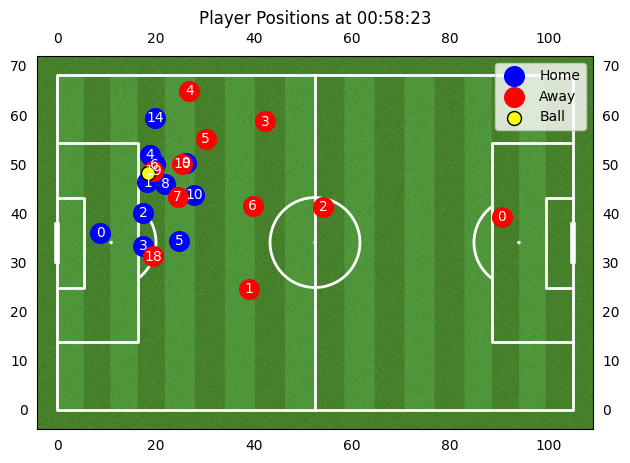

In [52]:
visualize(1801)